In [193]:
import pandas as pd
import geopandas as gpd
from zipfile import ZipFile

PATH01 = './IOP1_BEST_RADAR.zip'

FIRST_ROW = 0
LAST_ROW = 500

def read_tracking(path,fr_row,lt_row):
    read_columns = ['time','timestamp','uid','status','angle','velm','area_t','global_mean_threshold',
                    'lifetime','geometry_t','geom_30','geom_40']
    
    zip_file = ZipFile(path)
    for f in zip_file.infolist():
        if f.filename.endswith('.csv') and 'FINAL' in f.filename:
            tracking_df = pd.read_csv(zip_file.open(f),usecols=read_columns,skiprows=fr_row, nrows=lt_row)
            tracking_df = tracking_df[read_columns]
    return tracking_df

In [238]:
zip_file = ZipFile(PATH01)
for f in zip_file.infolist():
    if f.filename.endswith('.csv') and 'FINAL' in f.filename:
        tracking_df = pd.read_csv(zip_file.open(f),skiprows=0, nrows=500)

In [170]:
count = 0

for i in tk.uid.unique():
    if len(tk.query('uid == @i')) > 1:
        print('FAM_'+str(count),' UID->'+str(i),tk.query('uid == @i').lifetime.values[-1])
        count += 1

FAM_0  UID->2.0 0 days 00:24:00
FAM_1  UID->3.0 0 days 00:24:00
FAM_2  UID->4.0 0 days 00:12:00


In [315]:
tk = tracking_df[['timestamp','time','uid','area_t','angle','velm','centroid_t','centroid_tp',
                  'linestring','total_area_40','n_poly_30','status','lifetime']]

# tk.query('uid == 1')

In [264]:
for c in tracking_df.columns:
    print(c)

Unnamed: 0
time
timestamp
uid
id_t
id_tp
area_t
area_tp
intersect_geom
overlap_percent
geometry_t
geometry_tp
centroid_t
centroid_tp
p0
p1
growth
merged
root
status
linestring
angle
length
velm
global_mean_threshold
rainrate
geom_30
geom_40
centroid_30
centroid_40
areas_30
areas_40
total_area_30
total_area_40
n_poly_30
n_poly_40
mean_threshold_30
mean_threshold_40
internal_linestring_30
internal_linestring_40
internal_length_30
internal_length_40
internal_length_mean_30
internal_length_mean_40
internal_angle_30
internal_angle_40
internal_angle_mean_30
internal_angle_mean_40
internal_cent_30
internal_cent_40
mean_rain_rate_30
mean_rain_rate_40
internal_velm_30
internal_velm_40
lifetime
result_vector_20
pred_point_20
used_points_20
pred_geo_20
pred_area_20
pred_cent_20
pred_linestring_20
pred_length_20
pred_angle_20
nc_file
pixel_area_20
HIT_20
FALSE_ALARM_20
FAR_20
predict_path
uid_pred_path
tracking_path
uid_tracking_path
index_
result_vector_30
pred_point_30
used_points_30
pred_geo_30

In [317]:
tk.loc[tk['timestamp'] == '2014-02-01 19:00:00'].query('uid == 27')

,timestamp,time,uid,area_t,angle,velm,centroid_t,centroid_tp,linestring,total_area_40,n_poly_30,status,lifetime
303,2014-02-01 19:00:00,95.0,27.0,2441.121798,153.438013,42.798172,POINT (96.30356641926026 171.2166537916858),POINT (100.5816783116825 171.5203835335193),LINESTRING (100.5816783116825 171.520383533519...,30.038986,6.0,CONT,0 days 03:12:00


In [318]:
# timestamp
# uid     -> identificador unico
# time    -> timeindex

# lat lon -> centroid

# size_20    -> tamanho do sistema
# total_size_30    -> tamanho do sistema
# total_size_40    -> tamanho do sistema

# dsize   -> Delta área

# mean_ref_20 -> 
# mean_total_ref_30 -> 
# mean_total_ref_40 ->

# angle_20 ->
# avg_angle_30 ->
# avg_angle_40 ->

# vel_20_orig ->
# vel_20_cor ->
# avg_vel_30 ->
# avg_vel_40 ->

# n_cluster_30 ->
# n_cluster_40 ->

# status -> 
# lifetime -> delta_t


# MAX_REFLECT -> Máxima refletivida do cluster no tempo t
# DMAX_REFLECT -> Diferença entre a max (t-1) com (t)
# DMEAN_REFLECT -> Média



#### UM NOTEBOOK PARA CONVERTER TRACKING PARA FAMILY (No mínimo 2 clusters por familia)
#### UM NOTEBOOK PARA VISUALIZAR FAMILIY E CONSULTAR CLUSTERS

In [ ]:
## nome variável | unidade  | 

In [228]:
import numpy as np
import matplotlib.pyplot as plt 

In [290]:
matrix = np.load('20140201_190000_uid.npz')['arr_0']

dbz = np.load('20140201_190000_trk.npz')['arr_0']

In [291]:
uid_ = 27

In [292]:
uid_27 = matrix[:,:,1]

In [293]:
x,y,z = np.where(matrix == uid_)

In [311]:
np.nanmean(10**(dbz[x,y,1])/10)

6.317894771609907e+43

In [312]:
zs = np.nanmean(10**(dbz[x,y,1]/10))
varMean = 10*np.log10(zs)
varMean

36.952505466148175

In [253]:
plt.scatter(dbz[x,y,0])

TypeError: scatter() missing 1 required positional argument: 'y'

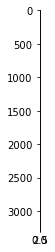

In [251]:
plt.imshow(dbz[x,y])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


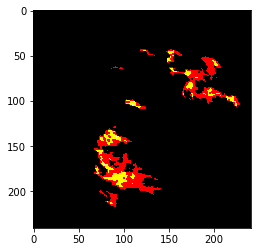

In [244]:
plt.imshow(dbz)